# MNIST with PyTorch Sequential Model

In [18]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision import datasets, transforms

In [2]:
# Loadintg Data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5),
                                                   (0.5, 0.5, 0.5)),])

trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [12]:
def mnist_model():
    n_input = 784 # 28*28 pixels image
    n_h1_layer = 128
    n_h2_layer = 64
    n_output = 10
    
    model = nn.Sequential(nn.Linear(n_input, n_h1_layer),
                         nn.ReLU(),
                         nn.Linear(n_h1_layer, n_h2_layer),
                         nn.ReLU(),
                         nn.Linear(n_h2_layer, n_output),
                         nn.LogSoftmax(dim=1))
    
    criterion = nn.NLLLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.003)
    
    epochs = 10
    
    for e in range(epochs):
        running_loss = 0
        
        for images, labels in trainloader:
            images = images.view(images.shape[0], -1)
            
            optimizer.zero_grad()
            
            output = model.forward(images)
            loss = criterion(output, labels)
            
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        print("Loss in epoch", e, running_loss/len(trainloader))
    
    return model

In [13]:
model = mnist_model()

Loss in epoch 0 1.941063327957064
Loss in epoch 1 0.9092637951503685
Loss in epoch 2 0.5624423898549985
Loss in epoch 3 0.45013595266001566
Loss in epoch 4 0.39814244688891653
Loss in epoch 5 0.3685094911946671
Loss in epoch 6 0.34845770724705544
Loss in epoch 7 0.3332256984227756
Loss in epoch 8 0.320335092900722
Loss in epoch 9 0.31016019359230995


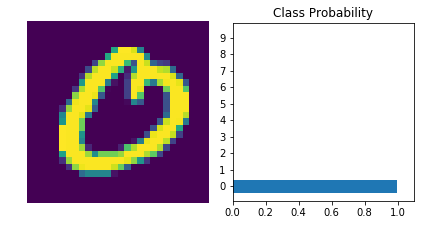

In [24]:
test_images, test_labels = next(iter(trainloader))

img = test_images[0].view(1, 784)

with torch.no_grad():
    logits = model.forward(img)
    
probility = F.softmax(logits, dim=1)
view_classify(img.view(1, 28, 28), probility)

In [22]:
# Copied

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()